In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from tqdm import tqdm



from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV 
from sklearn import linear_model, tree, ensemble 
#For training without cross_validation 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [2]:
Y_test_sample = pd.read_csv('y_test_sample.csv', low_memory=False)
X_train = pd.read_csv('X_train.csv', low_memory=False)
X_test = pd.read_csv('X_test.csv', low_memory=False)
Y_train = pd.read_csv('y_train.csv', low_memory=False)

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105109 entries, 0 to 105108
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   credit_card_utilization     105109 non-null  float64
 1   age                         105109 non-null  int64  
 2   overdue_30_59_days          105109 non-null  int64  
 3   debt_to_income              105109 non-null  float64
 4   monthly_income              84116 non-null   float64
 5   credits_loans               105109 non-null  int64  
 6   overdue__more_than_90_days  105109 non-null  int64  
 7   mortgage_loans              105109 non-null  int64  
 8   overdue_60_89_days          105109 non-null  int64  
 9   family_members              102304 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 8.0 MB


In [4]:
print ('Кол-во пропущенных в monthly_income :', sum(X_train['monthly_income'].isnull()))

X_train[X_train['monthly_income'].isnull()].head(5)

Кол-во пропущенных в monthly_income : 20993


,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
20,1.156862,69,0,34.666092,NaN,0,0,0,0,0.0
23,0.176205,93,0,297.962783,NaN,3,0,0,0,NaN
36,0.280279,49,0,2226.820771,NaN,6,0,2,0,2.0
39,0.148479,47,0,5322.022996,NaN,15,0,3,0,2.0
40,0.027631,55,0,7393.317898,NaN,12,0,2,0,0.0


In [5]:
X_train['monthly_income'].fillna(X_train['monthly_income'].mean(), inplace = True)

In [6]:
print ('Кол-во пропущенных в family_members :', sum(X_train['family_members'].isnull()))

X_train[X_train['family_members'].isnull()].head(5)

Кол-во пропущенных в family_members : 2805


,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
23,0.176205,93,0,297.962783,6649.725036,3,0,0,0,NaN
43,0.049335,77,0,695.154036,6649.725036,8,0,1,0,NaN
58,1.170441,33,0,690.020506,6649.725036,4,0,0,0,NaN
135,0.000000,79,0,0.000000,6649.725036,2,0,0,0,NaN
164,1.029744,36,2,391.364373,6649.725036,3,3,0,0,NaN


In [7]:
X_train['family_members'].fillna(float(round(X_train['family_members'].mean())), inplace = True)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105109 entries, 0 to 105108
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   credit_card_utilization     105109 non-null  float64
 1   age                         105109 non-null  int64  
 2   overdue_30_59_days          105109 non-null  int64  
 3   debt_to_income              105109 non-null  float64
 4   monthly_income              105109 non-null  float64
 5   credits_loans               105109 non-null  int64  
 6   overdue__more_than_90_days  105109 non-null  int64  
 7   mortgage_loans              105109 non-null  int64  
 8   overdue_60_89_days          105109 non-null  int64  
 9   family_members              105109 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 8.0 MB


In [9]:
X_train.corr()

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
credit_card_utilization,1.000000,-0.007313,-0.001276,0.003155,0.010572,-0.010075,-0.000959,0.003955,-0.000945,0.001980
age,-0.007313,1.000000,-0.064367,0.023804,0.042710,0.148412,-0.062283,0.032206,-0.058455,-0.205389
overdue_30_59_days,-0.001276,-0.064367,1.000000,-0.007899,-0.010438,-0.056056,0.984247,-0.030510,0.987364,-0.002459
debt_to_income,0.003155,0.023804,-0.007899,1.000000,-0.007851,0.053406,-0.009179,0.129559,-0.008469,-0.041065
monthly_income,0.010572,0.042710,-0.010438,-0.007851,1.000000,0.105573,-0.013344,0.149777,-0.011929,0.070812
credits_loans,-0.010075,0.148412,-0.056056,0.053406,0.105573,1.000000,-0.080645,0.429016,-0.071783,0.061118
overdue__more_than_90_days,-0.000959,-0.062283,0.984247,-0.009179,-0.013344,-0.080645,1.000000,-0.045748,0.993282,-0.009849
mortgage_loans,0.003955,0.032206,-0.030510,0.129559,0.149777,0.429016,-0.045748,1.000000,-0.040200,0.120242
overdue_60_89_days,-0.000945,-0.058455,0.987364,-0.008469,-0.011929,-0.071783,0.993282,-0.040200,1.000000,-0.010641
family_members,0.001980,-0.205389,-0.002459,-0.041065,0.070812,0.061118,-0.009849,0.120242,-0.010641,1.000000


In [10]:
# нет сильно коррелирующих столбцов, тогда оставляем как есть

In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38876 entries, 0 to 38875
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       38876 non-null  int64  
 1   credit_card_utilization     38876 non-null  float64
 2   age                         38876 non-null  int64  
 3   overdue_30_59_days          38876 non-null  int64  
 4   debt_to_income              38876 non-null  float64
 5   monthly_income              31331 non-null  float64
 6   credits_loans               38876 non-null  int64  
 7   overdue__more_than_90_days  38876 non-null  int64  
 8   mortgage_loans              38876 non-null  int64  
 9   overdue_60_89_days          38876 non-null  int64  
 10  family_members              37921 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 3.3 MB


In [12]:
print ('Кол-во пропущенных в family_members :', sum(X_test['family_members'].isnull()))

X_test[X_test['family_members'].isnull()].head(5)

Кол-во пропущенных в family_members : 955


,index,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
6,53924,0.000000,38,0,2467.226297,NaN,9,0,2,0,NaN
151,115671,0.018437,84,0,45.365909,NaN,10,0,0,0,NaN
181,41728,0.061493,67,0,998.198392,NaN,5,0,1,0,NaN
240,129723,0.266220,65,0,890.750264,NaN,9,1,1,0,NaN
296,142622,0.027160,87,0,523.882141,NaN,6,0,1,0,NaN


In [13]:
X_test['family_members'].fillna(float(round(X_train['family_members'].mean())), inplace = True)

In [14]:
X_test['monthly_income'].fillna(X_test['monthly_income'].mean(), inplace = True)

In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38876 entries, 0 to 38875
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       38876 non-null  int64  
 1   credit_card_utilization     38876 non-null  float64
 2   age                         38876 non-null  int64  
 3   overdue_30_59_days          38876 non-null  int64  
 4   debt_to_income              38876 non-null  float64
 5   monthly_income              38876 non-null  float64
 6   credits_loans               38876 non-null  int64  
 7   overdue__more_than_90_days  38876 non-null  int64  
 8   mortgage_loans              38876 non-null  int64  
 9   overdue_60_89_days          38876 non-null  int64  
 10  family_members              38876 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 3.3 MB


In [16]:
X_test.head()

,index,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,143522,0.021069,60,0,0.184907,14403.715440,9,0,1,0,0.0
1,116747,0.009985,82,0,0.446264,6768.581963,6,0,3,0,0.0
2,66075,0.535187,43,1,0.406317,4686.080429,14,0,2,0,3.0
3,133292,0.051264,31,0,0.311893,3867.175176,8,0,0,0,1.0
4,83134,0.069525,45,0,0.294956,9869.273012,6,0,1,0,2.0


In [17]:
X_test.drop(['index'], axis=1, inplace=True)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
from sklearn.naive_bayes import GaussianNB

### KNN

In [22]:
model = KNeighborsClassifier(n_neighbors = 5)

In [23]:
model.fit(X_train, Y_train['target'])

KNeighborsClassifier()

In [24]:
predictions = model.predict(X_test)

In [25]:
predictions.mean()

0.004192818191171932

In [26]:
Y_test_sample.drop(['target'], axis=1, inplace=True)
Y_test_sample['target'] = predictions
Y_test_sample.to_csv('y_test_sample.csv', index=False)

In [93]:
# скор около 0.5, не заходит с разным количеством параметров, так что возьмем другую модель

### RANDOM FOREST

In [94]:
model = RandomForestClassifier()

In [95]:
model.fit(X_train, Y_train['target'])

RandomForestClassifier()

In [96]:
predictions = model.predict(X_test)

In [97]:
predictions.mean()

0.024230887951435333

In [98]:
Y_test_sample.drop(['target'], axis=1, inplace=True)
Y_test_sample['target'] = predictions
Y_test_sample.to_csv('y_test_sample.csv', index=False)

In [99]:
# скор чуть выше 0.59

### Random forest с кросс-валидацией

In [96]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state = 1)
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
search = GridSearchCV(model, space, scoring = 'accuracy', cv = kf, refit = True)

In [97]:
result = search.fit(X_train, Y_train['target'])

In [98]:
best_model = result.best_estimator_

In [99]:
predict_values = best_model.predict(X_test)

In [101]:
Y_test_sample.drop(['target'], axis=1, inplace=True)

In [102]:
Y_test_sample['target'] = predict_values

In [103]:
Y_test_sample.to_csv('y_test_sample.csv', index=False)

In [104]:
predict_values.mean()

0.021581438419590492

In [1]:
# как ни странно, эта модель показывает хуже результат: примерно 0.58

## попробуем gradient boosting

In [100]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train, Y_train['target'])

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [101]:
predictions = model.predict(X_test)

In [102]:
predictions.mean()

0.05625578763247248

In [103]:
Y_test_sample.drop(['target'], axis=1, inplace=True)
Y_test_sample['target'] = predictions
Y_test_sample.to_csv('y_test_sample.csv', index=False)

In [104]:
# пока что лучший скор: 0.65

#### попробуем его же с параметрами по умолчанию

In [61]:
model = GradientBoostingClassifier()
model.fit(X_train, Y_train['target'])

GradientBoostingClassifier()

In [62]:
predictions = model.predict(X_test)

In [63]:
predictions.mean() # скор 0.58

0.02325342113386151

In [198]:
Y_test_sample.drop(['target'], axis=1, inplace=True)
Y_test_sample['target'] = predictions
Y_test_sample.to_csv('y_test_sample.csv', index=False)

## Попробуем Desicion trees

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model = DecisionTreeClassifier(random_state=0)

In [31]:
model.fit(X_train, Y_train['target'])

DecisionTreeClassifier(random_state=0)

In [32]:
predictions = model.predict(X_test)

In [33]:
predictions.mean()

0.0786346331927153

In [34]:
Y_test_sample.drop(['target'], axis=1, inplace=True)
Y_test_sample['target'] = predictions
Y_test_sample.to_csv('y_test_sample.csv', index=False)

In [35]:
# результат хуже, примерно 0.61

## сделаем кросс валидацию и подберём параметры для лучших моделей: Desicion tree и gradient boosting 

In [132]:
# Используем перекрестную проверку для выбора наилучшей модели

In [151]:
# score для decision tree

In [158]:
kf = StratifiedKFold(n_splits=5, shuffle=True)

In [159]:
score = cross_val_score(DecisionTreeClassifier(random_state=5), X_train, Y_train, cv = kf)

In [160]:
score.mean()

0.8976395975825145

In [168]:
# score для gradient boosting (запустим с параметрами по умолчанию)

In [169]:
score = cross_val_score(GradientBoostingClassifier(), X_train, Y_train['target'], cv = kf)

In [170]:
score.mean()

0.9375315032041998

In [171]:
# проверим на всякий случай скор у random forest

In [178]:
score = cross_val_score(RandomForestClassifier(), X_train, Y_train['target'], cv = kf)

In [181]:
score.mean()

0.936009280687645

In [182]:
# у random forest тоже высокий скор, но кросс валидация не зашла. попробуем сделать для gradient boosting

In [76]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
model = GradientBoostingClassifier()
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
search = GridSearchCV(model, space, scoring = 'accuracy', cv = kf, refit = True)

In [77]:
result = search.fit(X_train, Y_train['target'])

KeyboardInterrupt: 

In [187]:
best_model = result.best_estimator_

In [188]:
predict_values = best_model.predict(X_test)

In [190]:
predict_values

array([0, 0, 0, ..., 0, 0, 0])

In [191]:
predict_values.mean()

0.024385224817368042

In [192]:
Y_test_sample.drop(['target'], axis=1, inplace=True)
Y_test_sample['target'] = predictions
Y_test_sample.to_csv('y_test_sample.csv', index=False)

In [193]:
# лучший скор, примерно 0.685

In [ ]:
# ROC_AUC

In [38]:
from sklearn.metrics import roc_auc_score

In [53]:
from sklearn.model_selection import train_test_split

Xtr, Xval, ytr, yval = train_test_split(X_train, Y_train['target'], test_size=0.2, random_state=42)

In [64]:
score = roc_auc_score(yval, predictions[:21022])

print('Score: {:.2f}'.format(score))

Score: 0.49


In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    penalty='l2',
    C=0.01
)

model.fit(X=Xtr, y=ytr)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

In [72]:
model.predict(Xval)

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
model.predict_proba(Xval)[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [74]:
predicted_probabilities = model.predict_proba(Xval)

predicted_probabilities

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [75]:
score = roc_auc_score(yval, predicted_probabilities[:, 1])

print('Score: {:.2f}'.format(score))

Score: 0.61


In [71]:
model.fit(X=Xtr, y=ytr)

DecisionTreeClassifier(random_state=0)

In [201]:
result = search.fit(X=Xtr, y=ytr)

KeyboardInterrupt: 

In [81]:
best_model = result.best_estimator_

In [88]:
best_model.fit(X=Xtr, y=ytr)

GradientBoostingClassifier(max_features=2)

In [202]:
best_model.predict(Xval)

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
best_model.predict_proba(Xval)[:,1]

array([0.03909263, 0.00815781, 0.01519034, ..., 0.0663276 , 0.00852519,
       0.06238412])

In [91]:
predicted_probabilities = model.predict_proba(Xval)

predicted_probabilities

array([[0.95714297, 0.04285703],
       [0.99144324, 0.00855676],
       [0.98766826, 0.01233174],
       ...,
       [0.92178497, 0.07821503],
       [0.99030133, 0.00969867],
       [0.94373425, 0.05626575]])

In [92]:
score = roc_auc_score(yval, predicted_probabilities[:, 1])

print('Score: {:.2f}'.format(score))

Score: 0.87


In [ ]:
# Тюнинг Gradient Boosting

In [231]:
cv = StratifiedKFold(shuffle=True, n_splits=5, random_state=42)
model = GradientBoostingClassifier()
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = range(2, 10, 2)
search = GridSearchCV(model, space, scoring = 'roc_auc', cv = kf)

In [232]:
search.fit(X=Xtr, y=ytr) 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'max_features': range(2, 10, 2),
                         'n_estimators': [10, 100, 500]},
             scoring='roc_auc')

In [233]:
search.best_estimator_

GradientBoostingClassifier(max_features=2, n_estimators=500)

In [234]:
search.best_params_

{'max_features': 2, 'n_estimators': 500}

In [235]:
search.best_score_

0.8623069942184678

In [236]:
search.cv_results_['mean_test_score']

array([0.84851468, 0.86150615, 0.86230699, 0.84907154, 0.86104873,
       0.86191868, 0.84661672, 0.86083863, 0.8614733 , 0.84202884,
       0.86098523, 0.86129923])

In [237]:
stds = search.cv_results_['std_test_score']
stds


array([0.00496977, 0.00486814, 0.00462307, 0.00523066, 0.00434114,
       0.00457452, 0.00403826, 0.00461303, 0.00397553, 0.00570053,
       0.0045907 , 0.00436911])

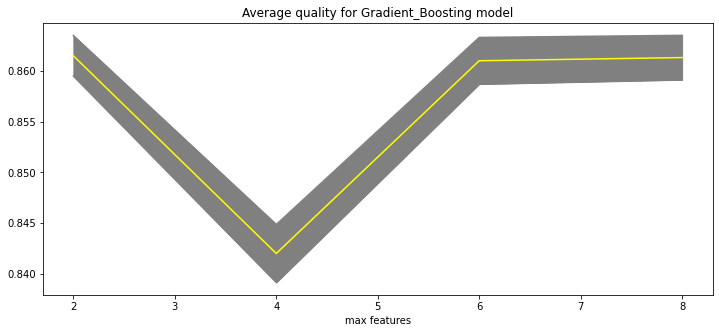

In [240]:
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
error = 0.5 * stds

plt.figure(figsize=(12, 5))
plt.plot(space['max_features'], means[8:12], color = 'yellow')
plt.plot(space['max_features'], means[8:12] - error[8:12], color = 'grey')
plt.plot(space['max_features'], means[8:12] + error[8:12], color = 'grey')
plt.fill_between(space['max_features'], means[8:12] - error[8:12], means[8:12] + error[8:12], color = 'grey')
plt.xlabel('max features')
plt.title('Average quality for Gradient_Boosting model')
plt.show()

In [ ]:
# продолжим тюнинг с n_esimator = 500

In [142]:
cv = StratifiedKFold(shuffle=True, n_splits=5, random_state=42)
model = GradientBoostingClassifier()
space = dict()
space['n_estimators'] = [500]
space['max_features'] = range(1, 20, 2)
search = GridSearchCV(model, space, scoring = 'roc_auc', cv = kf)

In [143]:
search.fit(X=Xtr, y=ytr) 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 498, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 555, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 211, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 498, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 555, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 211, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 498, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 555, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 211, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'max_features': range(1, 20, 2),
                         'n_estimators': [500]},
             scoring='roc_auc')

In [144]:
search.best_estimator_

GradientBoostingClassifier(max_features=1, n_estimators=500)

In [145]:
search.best_params_

{'max_features': 1, 'n_estimators': 500}

In [146]:
search.best_score_

0.8616401168359383

In [147]:
search.cv_results_['mean_test_score']

array([0.86164012, 0.86154629, 0.86141723, 0.86120616, 0.86132071,
              nan,        nan,        nan,        nan,        nan])

In [148]:
stds = search.cv_results_['std_test_score']
stds

array([0.00443078, 0.0043754 , 0.00428579, 0.00392871, 0.00403357,
              nan,        nan,        nan,        nan,        nan])

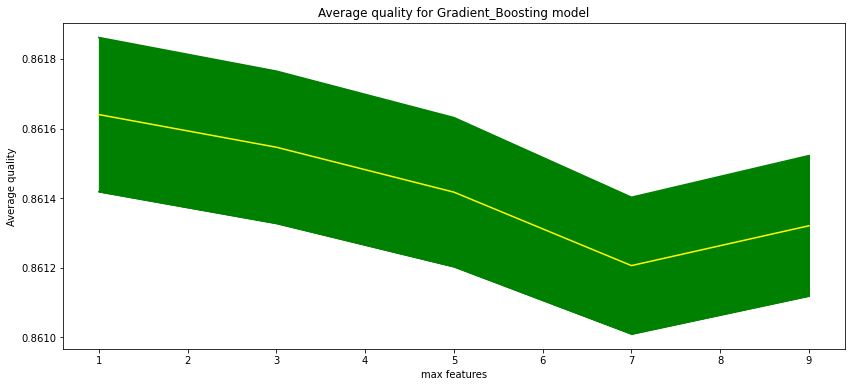

In [153]:
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
error = 0.05 * stds

plt.figure(figsize=(14, 6))
plt.plot(space['max_features'][:5], means[:5], color = 'yellow')
plt.plot(space['max_features'][:5], means[:5] - error[:5], color = 'green')
plt.plot(space['max_features'][:5], means[:5] + error[:5], color = 'green')
plt.fill_between(space['max_features'][:5], means[:5] - error[:5], means[:5] + error[:5], color = 'green')
plt.xlabel('max features')
plt.ylabel('Average quality')
plt.title('Average quality for Gradient_Boosting model')
plt.show()

In [140]:
# сделаем тюнниг DecisionTree

In [223]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(
    min_samples_split=5, 
    min_samples_leaf=10,
    criterion='gini',
    random_state=42
)

params = {
    'max_depth': [x for x in range(1, 14)],
}


GS_dtc = GridSearchCV(
    estimator=dtc, 
    param_grid=params, 
    cv=cv, 
    scoring='roc_auc'
)

In [224]:
GS_dtc.fit(X=Xtr, y=ytr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(min_samples_leaf=10,
                                              min_samples_split=5,
                                              random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13]},
             scoring='roc_auc')

In [225]:
GS_dtc.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=5,
                       random_state=42)

In [226]:
GS_dtc.best_params_

{'max_depth': 7}

In [227]:
GS_dtc.best_score_

0.8442823799090042

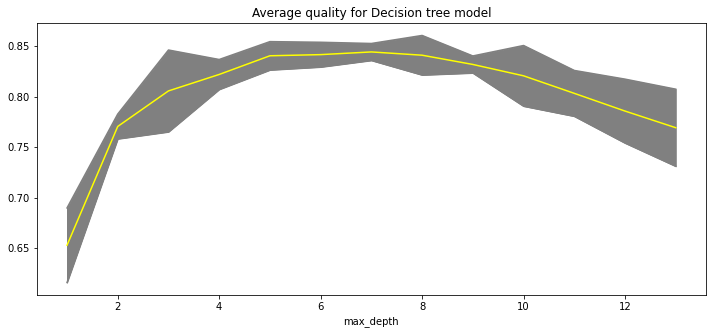

In [230]:
means = GS_dtc.cv_results_['mean_test_score']
stds = GS_dtc.cv_results_['std_test_score']

error = 5 * stds

plt.figure(figsize=(12, 5))
plt.plot(params['max_depth'], means, color = 'yellow')
plt.plot(params['max_depth'], means - error, color = 'grey')
plt.plot(params['max_depth'], means + error, color = 'grey')
plt.fill_between(params['max_depth'], means - error, means + error, color = 'grey')
plt.xlabel('max_depth')
plt.title('Average quality for Decision tree model')
plt.show()

In [210]:
model = KNeighborsClassifier()

params = {
    'n_neighbors': range(1, 50, 2)
}

GS_kNN = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    cv=cv, 
    scoring='roc_auc'
)

GS_kNN.fit(X_scaled, ytr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50, 2)}, scoring='roc_auc')

In [211]:
GS_kNN.best_params_

{'n_neighbors': 49}

In [212]:
GS_kNN.best_score_

0.7587345176427756

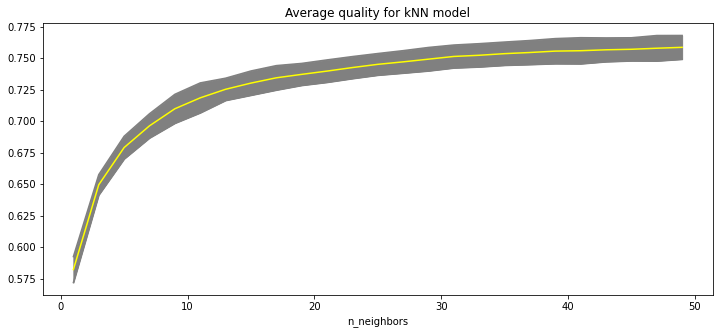

In [221]:
means = GS_kNN.cv_results_['mean_test_score']
stds = GS_kNN.cv_results_['std_test_score']
error = 1.2 * stds

plt.figure(figsize=(12, 5))
plt.plot(params['n_neighbors'], means, color = 'yellow')
plt.plot(params['n_neighbors'], means - error, color = 'grey')
plt.plot(params['n_neighbors'], means + error, color = 'grey')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'grey')
plt.xlabel('n_neighbors')
plt.title('Average quality for kNN model')
plt.show()

### Посмотрим на метрики

In [161]:
from sklearn.metrics import confusion_matrix, classification_report

In [174]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_scaled = ss.fit_transform(Xtr)
X_val_scaled = ss.transform(Xval)



kNN_model = GS_kNN.best_estimator_ 
GB_model = search.best_estimator_ 
DT_model = GS_dtc.best_estimator_

In [195]:
print('kNN')
print(classification_report(yval, kNN_model.predict(Xval)))

print('\nGradient Boosting')
print(classification_report(yval, GB_model.predict(Xval)))

print('\nDecision tree')
print(classification_report(yval, DT_model.predict(Xval)))

kNN
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     19628
           1       0.00      0.00      0.00      1394

    accuracy                           0.93     21022
   macro avg       0.47      0.50      0.48     21022
weighted avg       0.87      0.93      0.90     21022


Gradient Boosting
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     19628
           1       0.60      0.21      0.31      1394

    accuracy                           0.94     21022
   macro avg       0.77      0.60      0.64     21022
weighted avg       0.92      0.94      0.92     21022


Decision tree
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     19628
           1       0.57      0.21      0.31      1394

    accuracy                           0.94     21022
   macro avg       0.76      0.60      0.64     21022
weighted avg       0.92      0.94   

In [196]:
# построим кривые

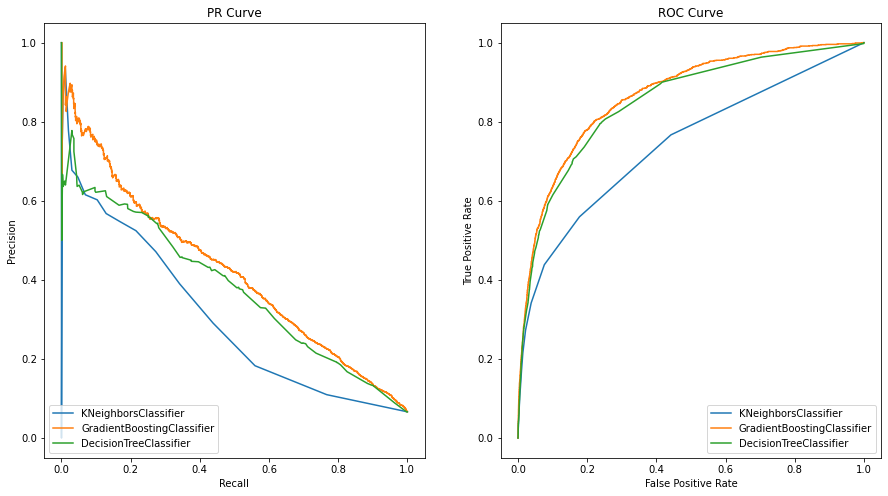

In [242]:
from sklearn.metrics import precision_recall_curve, roc_curve

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
    
for model in [kNN_model, GB_model, DT_model]:
    
    if model == kNN_model:
        scores = model.predict_proba(X_val_scaled)[:, 1]
    else:
        scores = model.predict_proba(Xval)[:, 1]
    
    p, r, _ = precision_recall_curve(yval, scores)
    tpr, fpr, _ = roc_curve(yval, scores)
    
    ax1.plot(r,p,label=model.__class__.__name__) 
    ax2.plot(tpr,fpr,label=model.__class__.__name__)


ax1.legend(loc='lower left')    
ax2.legend(loc='lower right')
                                          
plt.show()